# Neural Networks

## Building the Neural Networks

Use the following dataset https://www.kaggle.com/datasets/anmolkumar/health-insurance-cross-sell-prediction?select=train.csv to build three different neural networks using

> different layers


> activation functions


> number of neurons per layer


> number of layers











In [53]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
import keras
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [54]:
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder

In [55]:
data = pd.read_csv('./train.csv')

### Data pre-processing

In [56]:
data = data.drop(columns='id')

In [57]:
data

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0
...,...,...,...,...,...,...,...,...,...,...,...
381104,Male,74,1,26.0,1,1-2 Year,No,30170.0,26.0,88,0
381105,Male,30,1,37.0,1,< 1 Year,No,40016.0,152.0,131,0
381106,Male,21,1,30.0,1,< 1 Year,No,35118.0,160.0,161,0
381107,Female,68,1,14.0,0,> 2 Years,Yes,44617.0,124.0,74,0


<Axes: xlabel='Response'>

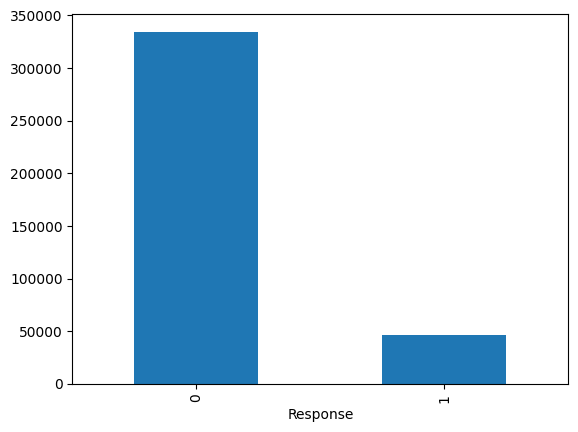

In [58]:
data['Response'].value_counts().plot.bar()

In [59]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Gender                381109 non-null  object 
 1   Age                   381109 non-null  int64  
 2   Driving_License       381109 non-null  int64  
 3   Region_Code           381109 non-null  float64
 4   Previously_Insured    381109 non-null  int64  
 5   Vehicle_Age           381109 non-null  object 
 6   Vehicle_Damage        381109 non-null  object 
 7   Annual_Premium        381109 non-null  float64
 8   Policy_Sales_Channel  381109 non-null  float64
 9   Vintage               381109 non-null  int64  
 10  Response              381109 non-null  int64  
dtypes: float64(3), int64(5), object(3)
memory usage: 32.0+ MB


In [60]:
label=LabelEncoder()
ordinal=OrdinalEncoder()

In [61]:
data['Gender']=label.fit_transform(data['Gender'])

In [62]:
data['Vehicle_Damage']=label.fit_transform(data['Vehicle_Damage'])

In [63]:
data['Vehicle_Age'] = ordinal.fit_transform(data['Vehicle_Age'].values.reshape(-1,1))

In [64]:
X, Y = data.drop(columns='Response'), data['Response']

In [65]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [66]:
scaler = MinMaxScaler()

In [68]:
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

### Neural Network 1

#### Optimize number of epochs and batch size for NN1

In [ ]:
epochs_list= [3, 4, 5]
batch_sizes=[32, 64, 128]

In [ ]:
from sklearn.metrics import f1_score

In [72]:
results1 = {}
for epoch in epochs_list:
    for batch_size in batch_sizes:
        model = Sequential()
        model.add(Dense(32, activation='relu'))
        model.add(Dense(16, activation='relu'))
        model.add(Dense(8, activation='relu'))
        model.add(Dense(1, activation='sigmoid'))
        
        model.compile(optimizer=keras.optimizers.Adam(), loss='binary_crossentropy', metrics=[keras.metrics.Precision(), keras.metrics.Recall()])

        history = model.fit(X_train, Y_train, epochs=epoch, batch_size=batch_size)

        y_pred = model.predict(X_test)
        
        # Convert predictions to binary (0 or 1)
        y_pred_binary = (y_pred > 0.5).astype(int)

        f1 = f1_score(Y_test, y_pred_binary)

        results1[(epoch, batch_size)] = f1



Epoch 1/3
9528/9528 [==============================] - 9s 857us/step - loss: 0.2771 - precision_9: 0.1037 - recall_9: 3.7385e-04
Epoch 2/3
9528/9528 [==============================] - 8s 858us/step - loss: 0.2703 - precision_9: 0.0000e+00 - recall_9: 0.0000e+00
Epoch 3/3
2382/2382 [==============================] - 2s 638us/step
Epoch 1/3
4764/4764 [==============================] - 5s 853us/step - loss: 0.2790 - precision_10: 0.0000e+00 - recall_10: 0.0000e+00
Epoch 2/3
4764/4764 [==============================] - 4s 857us/step - loss: 0.2703 - precision_10: 1.0000 - recall_10: 2.6704e-05
Epoch 3/3
2382/2382 [==============================] - 2s 636us/step
Epoch 1/3
2382/2382 [==============================] - 3s 872us/step - loss: 0.2785 - precision_11: 0.0339 - recall_11: 1.0681e-04
Epoch 2/3
2382/2382 [==============================] - 2s 860us/step - loss: 0.2702 - precision_11: 0.0000e+00 - recall_11: 0.0000e+00
Epoch 3/3
2382/2382 [==============================] - 2s 636us/step

In [74]:
best_combination1 = max(results1, key=results.get)
best_epoch1, best_batch_size1 = best_combination1
best_f1_score1 = results1[best_combination]

print(f"Best combination1: Epochs={best_epoch1}, Batch Size1={best_batch_size1}, F1 Score1={best_f1_score1}")

Best combination1: Epochs=4, Batch Size1=128, F1 Score1=0.003869303525365434


### Neural Network 2

#### Optimize number of epochs and batch size for NN2

In [75]:
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import f1_score
import numpy as np

results2 = {}

Y_train_one_hot = to_categorical(Y_train, num_classes=2)
Y_test_one_hot = to_categorical(Y_test, num_classes=2)

for epoch in epochs_list:
    for batch_size in batch_sizes:
        model = Sequential()
        model.add(Dense(32, activation='relu'))
        model.add(Dense(16, activation='tanh'))
        model.add(Dense(8, activation='relu'))
        model.add(Dense(2, activation='softmax'))  
        
        model.compile(optimizer=keras.optimizers.Adam(), loss='categorical_crossentropy', metrics=[keras.metrics.Precision(), keras.metrics.Recall()])

        history = model.fit(X_train, Y_train_one_hot, epochs=epoch, batch_size=batch_size)

        y_pred_prob = model.predict(X_test)

        # Convert probabilities to binary (0 or 1)
        y_pred_binary = np.argmax(y_pred_prob, axis=1)

        f1 = f1_score(Y_test, y_pred_binary)

        results2[(epoch, batch_size)] = f1

Epoch 1/3
9528/9528 [==============================] - 9s 828us/step - loss: 0.2754 - precision_18: 0.8769 - recall_18: 0.8769
Epoch 2/3
9528/9528 [==============================] - 8s 836us/step - loss: 0.2705 - precision_18: 0.8772 - recall_18: 0.8772
Epoch 3/3
2382/2382 [==============================] - 2s 685us/step
Epoch 1/3
4764/4764 [==============================] - 5s 833us/step - loss: 0.2767 - precision_19: 0.8771 - recall_19: 0.8771
Epoch 2/3
4764/4764 [==============================] - 4s 834us/step - loss: 0.2705 - precision_19: 0.8772 - recall_19: 0.8772
Epoch 3/3
2382/2382 [==============================] - 2s 676us/step
Epoch 1/3
2382/2382 [==============================] - 3s 841us/step - loss: 0.2816 - precision_20: 0.8771 - recall_20: 0.8771
Epoch 2/3
2382/2382 [==============================] - 2s 842us/step - loss: 0.2712 - precision_20: 0.8772 - recall_20: 0.8772
Epoch 3/3
2382/2382 [==============================] - 2s 679us/step
Epoch 1/4
9528/9528 [==========

In [76]:
best_combination2 = max(results2, key=results.get)
best_epoch2, best_batch_size2 = best_combination2
best_f1_score2 = results2[best_combination]

print(f"Best combination2: Epochs={best_epoch2}, Batch Size2={best_batch_size2}, F1 Score2={best_f1_score2}")

Best combination2: Epochs=4, Batch Size2=128, F1 Score2=0.0036574870912220313


In [79]:
from tensorflow.keras.layers import Dense, LeakyReLU
from tensorflow.keras.models import Sequential

### Neural Network 3

In [81]:
best_combination3 = max(results3, key=results.get)
best_epoch3, best_batch_size3 = best_combination3
best_f1_score3 = results3[best_combination]

print(f"Best combination3: Epochs={best_epoch3}, Batch Size3={best_batch_size3}, F1 Score3={best_f1_score3}")

Best combination3: Epochs=4, Batch Size3=128, F1 Score3=0.00021591277124041888


#### Optimize number of epochs and batch size for NN3

In [84]:
results3 = {}
for epoch in epochs_list:
    for batch_size in batch_sizes:
        model = Sequential()
        model.add(Dense(16, activation=LeakyReLU(alpha=0.01)))
        model.add(Dense(8, activation='tanh'))
        model.add(Dense(4, activation=LeakyReLU(alpha=0.02)))
        model.add(Dense(2, activation=LeakyReLU(alpha=0.02)))
        model.add(Dense(1, activation='sigmoid'))
        
        model.compile(optimizer=keras.optimizers.Adam(), loss='binary_crossentropy', metrics=[keras.metrics.Precision(), keras.metrics.Recall()])

        history = model.fit(X_train, Y_train, epochs=epoch, batch_size=batch_size)

        y_pred = model.predict(X_test)
        
        # Convert predictions to binary (0 or 1)
        y_pred_binary = (y_pred > 0.5).astype(int)

        f1 = f1_score(Y_test, y_pred_binary)

        results3[(epoch, batch_size)] = f1



Epoch 1/3
9528/9528 [==============================] - 9s 895us/step - loss: 0.2802 - precision_36: 0.3667 - recall_36: 0.0021
Epoch 2/3
9528/9528 [==============================] - 9s 899us/step - loss: 0.2732 - precision_36: 0.4741 - recall_36: 0.0032
Epoch 3/3
2382/2382 [==============================] - 2s 652us/step
Epoch 1/3
4764/4764 [==============================] - 5s 891us/step - loss: 0.2935 - precision_37: 0.1828 - recall_37: 4.5396e-04
Epoch 2/3
4764/4764 [==============================] - 4s 893us/step - loss: 0.2738 - precision_37: 0.0000e+00 - recall_37: 0.0000e+00
Epoch 3/3
2382/2382 [==============================] - 2s 953us/step
Epoch 1/3
2382/2382 [==============================] - 3s 918us/step - loss: 0.2901 - precision_38: 0.2857 - recall_38: 3.2044e-04
Epoch 2/3
2382/2382 [==============================] - 2s 914us/step - loss: 0.2716 - precision_38: 0.0000e+00 - recall_38: 0.0000e+00
Epoch 3/3
2382/2382 [==============================] - 2s 658us/step
Epoch 1

## Evaluate the three NNs

## Results analysis

In [83]:
print(f"Best combination1: Epochs={best_epoch1}, Batch Size1={best_batch_size1}, F1 Score1={best_f1_score1}")
print(f"Best combination2: Epochs={best_epoch2}, Batch Size2={best_batch_size2}, F1 Score2={best_f1_score2}")
print(f"Best combination3: Epochs={best_epoch3}, Batch Size3={best_batch_size3}, F1 Score3={best_f1_score3}")

Best combination1: Epochs=4, Batch Size1=128, F1 Score1=0.003869303525365434
Best combination2: Epochs=4, Batch Size2=128, F1 Score2=0.0036574870912220313
Best combination3: Epochs=4, Batch Size3=128, F1 Score3=0.00021591277124041888
